<a href="https://colab.research.google.com/github/sujan759/madicene_recomendation/blob/main/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Define file paths
file_paths = {
    "description": "/content/description.csv",
    "medications": "/content/medications.csv",
    "symptom_severity": "/content/Symptom-severity.csv",
    "workout": "/content/workout_df.csv"
}

# Load datasets
dfs = {name: pd.read_csv(path) for name, path in file_paths.items()}

# Display dataset info
for name, df in dfs.items():
    print(f"\nDataset: {name.upper()}")
    print(df.info())
    print(df.head())  # Show first few rows



Dataset: DESCRIPTION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Disease      41 non-null     object
 1   Description  41 non-null     object
dtypes: object(2)
memory usage: 788.0+ bytes
None
               Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...

Dataset: MEDICATIONS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Disease  

In [ ]:
# Drop unnecessary columns in workout dataset
dfs["workout"] = dfs["workout"].drop(columns=["Unnamed: 0.1", "Unnamed: 0"], errors="ignore")

# Standardize column names
dfs["workout"].rename(columns={"disease": "Disease"}, inplace=True)

# Display cleaned data
for name, df in dfs.items():
    print(f"\nCleaned Dataset: {name.upper()}")
    print(df.head())



Cleaned Dataset: DESCRIPTION
               Disease                                        Description
0     Fungal infection  Fungal infection is a common skin condition ca...
1              Allergy  Allergy is an immune system reaction to a subs...
2                 GERD  GERD (Gastroesophageal Reflux Disease) is a di...
3  Chronic cholestasis  Chronic cholestasis is a condition where bile ...
4        Drug Reaction  Drug Reaction occurs when the body reacts adve...

Cleaned Dataset: MEDICATIONS
               Disease                                         Medication
0     Fungal infection  ['Antifungal Cream', 'Fluconazole', 'Terbinafi...
1              Allergy  ['Antihistamines', 'Decongestants', 'Epinephri...
2                 GERD  ['Proton Pump Inhibitors (PPIs)', 'H2 Blockers...
3  Chronic cholestasis  ['Ursodeoxycholic acid', 'Cholestyramine', 'Me...
4        Drug Reaction  ['Antihistamines', 'Epinephrine', 'Corticoster...

Cleaned Dataset: SYMPTOM_SEVERITY
                S

In [ ]:
# Save cleaned data (Optional)
dfs["workout"].to_csv("/content/cleaned_workout.csv", index=False)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load necessary datasets
description_df = dfs["description"]
medications_df = dfs["medications"]

# Step 1: Convert Disease Descriptions into TF-IDF Vectors
vectorizer = TfidfVectorizer(stop_words="english")
tfidf_matrix = vectorizer.fit_transform(description_df["Description"])

# Step 2: Function to Recommend Medicine Based on Symptoms
def recommend_medicine(user_symptoms):
    """
    This function takes user symptoms as input and returns the most relevant medicine recommendation.
    """
    # Transform user input into a TF-IDF vector
    user_vector = vectorizer.transform([user_symptoms])

    # Calculate similarity with existing disease descriptions
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix)

    # Find the most similar disease
    closest_match_idx = similarity_scores.argmax()
    matched_disease = description_df.iloc[closest_match_idx]["Disease"]

    # Retrieve corresponding medicine
    medicine = medications_df.loc[medications_df["Disease"] == matched_disease, "Medication"].values

    if len(medicine) > 0:
        return f"Recommended Medicine for {matched_disease}: {medicine[0]}"
    else:
        return f"No medicine found for {matched_disease}."

# Step 3: Test the System
user_input = "I have a severe headache and fever."
recommendation = recommend_medicine(user_input)
print(recommendation)


Recommended Medicine for Migraine: ['Analgesics', 'Triptans', 'Ergotamine derivatives', 'Preventive medications', 'Biofeedback']


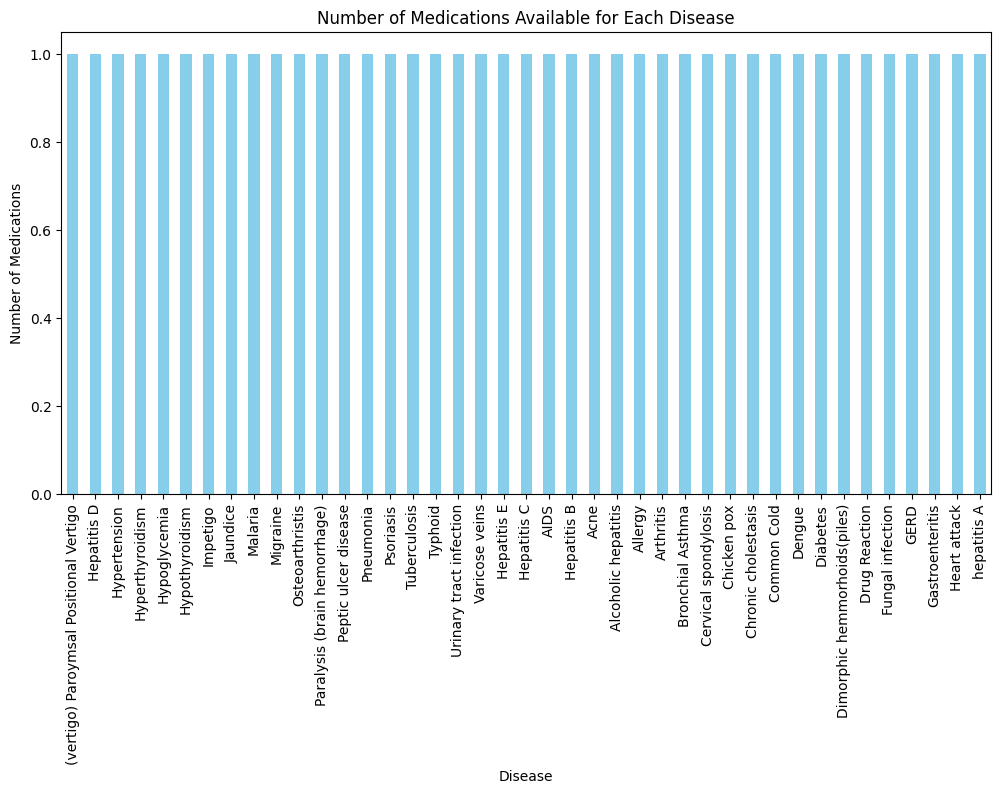

In [ ]:
import matplotlib.pyplot as plt

# Count number of medicines per disease
med_count = medications_df.groupby("Disease")["Medication"].count().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
med_count.plot(kind="bar", color="skyblue")
plt.xlabel("Disease")
plt.ylabel("Number of Medications")
plt.title("Number of Medications Available for Each Disease")
plt.xticks(rotation=90)
plt.show()


Index(['Symptom', 'weight'], dtype='object')


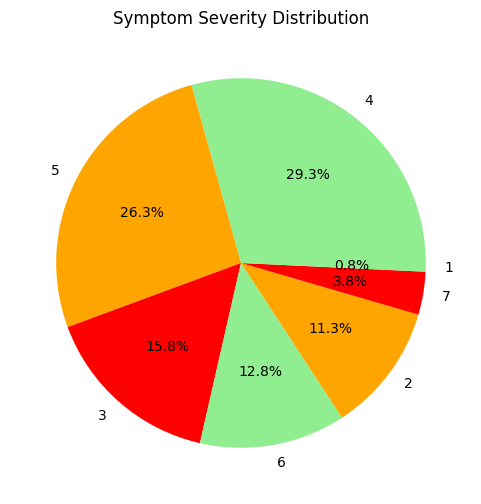

In [ ]:
# Load symptom severity dataset
symptom_severity_df = dfs["symptom_severity"]

# Check for typos or case sensitivity issues
print(symptom_severity_df.columns)  # Print the actual column names

# Correct the column name if needed
severity_count = symptom_severity_df["weight"].value_counts()  # Assuming "weight" is the correct column name

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(severity_count, labels=severity_count.index, autopct="%1.1f%%", colors=["lightgreen", "orange", "red"])
plt.title("Symptom Severity Distribution")
plt.show()

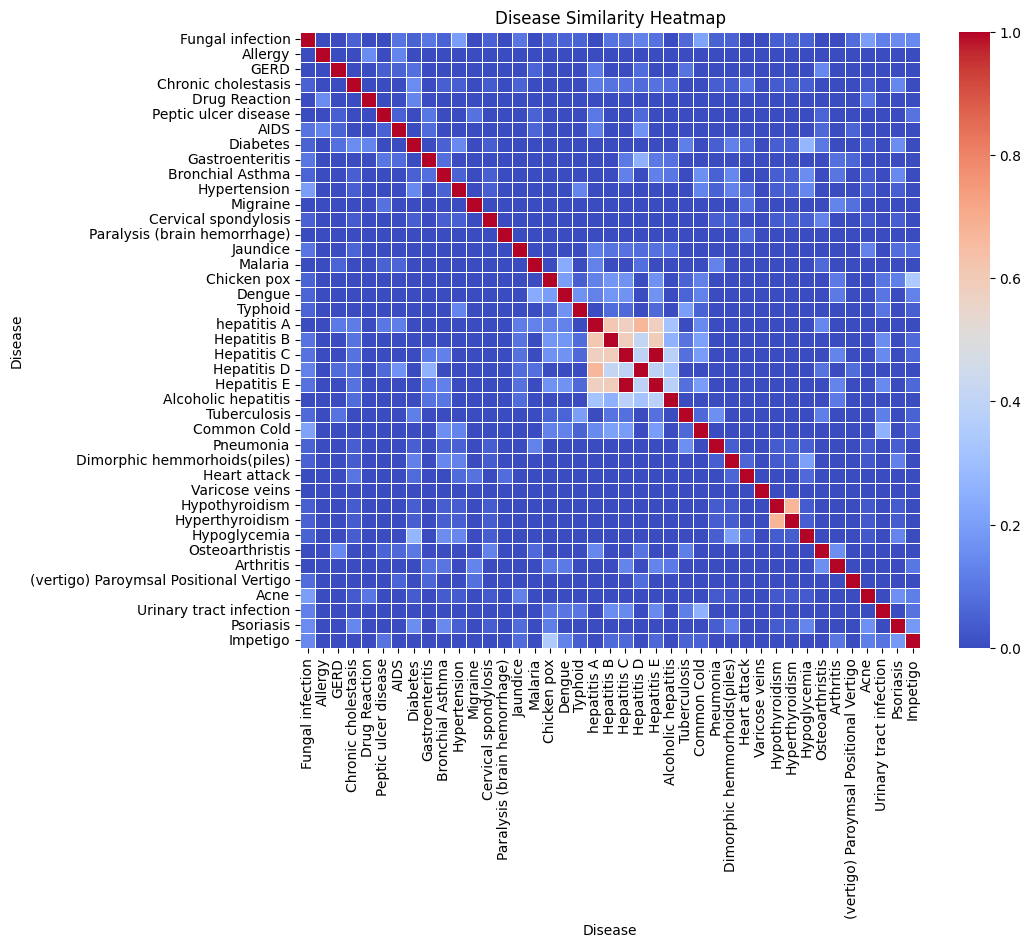

In [ ]:
import seaborn as sns

# Compute similarity matrix
similarity_matrix = cosine_similarity(tfidf_matrix)

# Convert to DataFrame
similarity_df = pd.DataFrame(similarity_matrix, index=description_df["Disease"], columns=description_df["Disease"])

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_df, cmap="coolwarm", linewidths=0.5)
plt.title("Disease Similarity Heatmap")
plt.show()


In [2]:
# Step 2: Load datasets
symptom_severity = pd.read_csv("/content/Symptom-severity.csv")
training_data = pd.read_csv("/content/Training.csv")
description = pd.read_csv("/content/description.csv")
diets = pd.read_csv("/content/diets.csv")
medications = pd.read_csv("/content/medications.csv")
precautions = pd.read_csv("/content/precautions_df.csv")
symptoms_df = pd.read_csv("/content/symtoms_df.csv")
workout_df = pd.read_csv("/content/workout_df.csv")

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-4-e9d8171618a4>:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Accuracy"], y=[accuracy], palette="Blues")


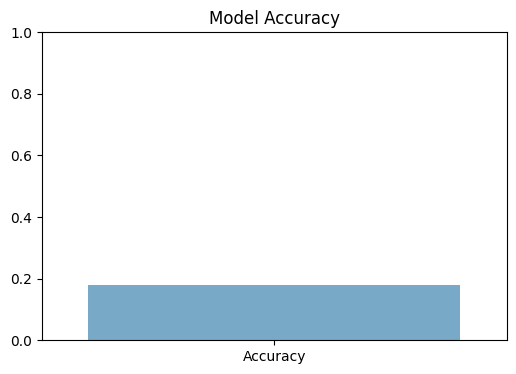

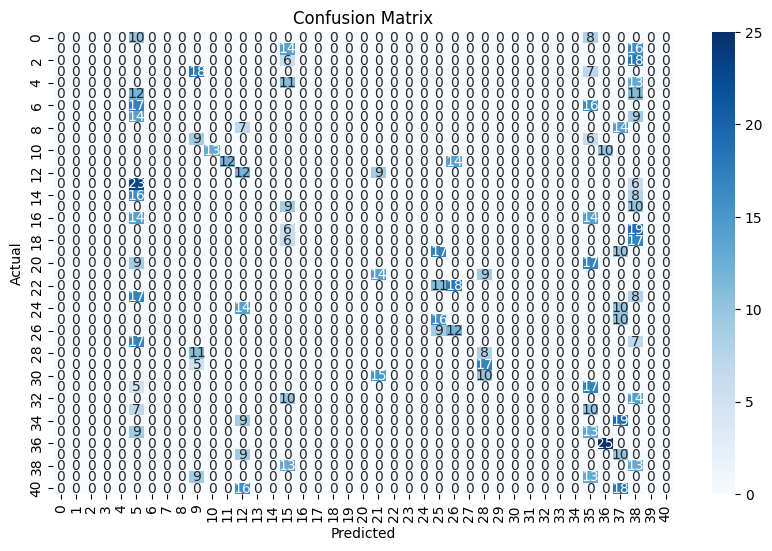

Enter your symptoms (comma separated)......ihave fell colde faver weeknes hedek

Predicted Disease: Common Cold
Description: Common Cold is a viral infection of the upper respiratory tract.

Precautions:
1: drink vitamin c rich drinks
2: take vapour
3: avoid cold food
4: keep fever in check

Medications:
1: ['Antibiotics', 'Antiviral drugs', 'Antifungal drugs', 'IV fluids', 'Oxygen therapy']

Workout Recommendations:
1: Stay hydrated
2: Include nutrient-rich foods
3: Consume foods rich in vitamin C and antioxidants
4: Include zinc-rich foods
5: Limit sugary foods and beverages
6: Consume chicken soup
7: Consult a healthcare professional
8: Rest and conserve energy
9: Gradually resume normal diet
10: Follow medical recommendations

Diet Recommendations:
1: ['Cold Diet', 'Hydration', 'Warm fluids', 'Rest', 'Honey and lemon tea']


In [4]:
# Step 1: Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re

# Step 2: Load datasets
symptom_severity = pd.read_csv("/content/Symptom-severity.csv")
training_data = pd.read_csv("/content/Training.csv")
description = pd.read_csv("/content/description.csv")
diets = pd.read_csv("/content/diets.csv")
medications = pd.read_csv("/content/medications.csv")
precautions = pd.read_csv("/content/precautions_df.csv")
symptoms_df = pd.read_csv("/content/symtoms_df.csv")
workout_df = pd.read_csv("/content/workout_df.csv")

# Step 3: Data Preprocessing
training_data.fillna("", inplace=True)
X = training_data.drop(columns=['prognosis'])
y = training_data['prognosis']

# Convert symptoms into a single text feature, ensuring no empty values
X.fillna("", inplace=True)

# --- Modification starts here ---
# 1. Explicitly convert symptoms to strings:
X = X.astype(str)  # Convert all columns to string type

# 2. Join symptoms using a space delimiter, handling potential NaNs:
X['symptoms_text'] = X.apply(lambda row: ' '.join(row.values), axis=1)

# 3. Remove rows with empty or whitespace-only symptoms_text:
X = X[X['symptoms_text'].str.strip() != ""]

# 4. If still empty, print warning and investigate further:
if X.empty:
    print("Warning: symptoms_text column is completely empty after preprocessing!")
    print(training_data.head())  # Inspect the original data for issues

# Step 4: Custom Tokenizer Function
def custom_tokenizer(text):
    # Remove non-alphanumeric characters except spaces
    text = re.sub(r"[^a-zA-Z0-9 ]+", "", text)
    return text.lower().split()

# Step 5: TF-IDF Vectorization
vectorizer = TfidfVectorizer(stop_words=None, tokenizer=custom_tokenizer)  # Do not remove stop words, use custom tokenizer
X_vectorized = vectorizer.fit_transform(X['symptoms_text'])

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

# Step 7: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Step 8: Predictions
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Step 9: Visualization of Accuracy
plt.figure(figsize=(6,4))
sns.barplot(x=["Accuracy"], y=[accuracy], palette="Blues")
plt.title("Model Accuracy")
plt.ylim(0,1)
plt.show()

# Step 10: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Step 11: Define Recommend Medicine Function
def recommend_medicine(user_symptoms):
    input_text = ' '.join(user_symptoms)  # Join symptoms into a single string
    input_vectorized = vectorizer.transform([input_text])  # Vectorize input using the same vectorizer
    predicted_disease = model.predict(input_vectorized)[0]  # Predict disease

    # Fetch related data for the predicted disease
    desc = description[description['Disease'] == predicted_disease]['Description'].values
    pre = precautions[precautions['Disease'] == predicted_disease][['Precaution_1', 'Precaution_2', 'Precaution_3', 'Precaution_4']].values
    med = medications[medications['Disease'] == predicted_disease]['Medication'].values
    die = diets[diets['Disease'] == predicted_disease]['Diet'].values
    wrkout = workout_df[workout_df['disease'] == predicted_disease]['workout'].values

    return predicted_disease, desc, med, die, pre, wrkout

# Step 12: Example Usage - Helper Function
def helper(user_symptoms):
    # This function calls recommend_medicine and returns the result
    return recommend_medicine(user_symptoms)

# Step 13: Example Usage - User Input and Predictions
symptoms = input("Enter your symptoms (comma separated)......")
user_symptoms = [s.strip() for s in symptoms.split(',')]  # Clean input

predicted_disease, desc, med, die, pre, wrkout = helper(user_symptoms)

# Step 14: Display Results
print("\nPredicted Disease:", predicted_disease)
print("Description:", desc[0] if len(desc) > 0 else "No description available")

print("\nPrecautions:")
for i, p in enumerate(pre[0], 1):
    print(f"{i}: {p}")

print("\nMedications:")
for i, m in enumerate(med, 1):
    print(f"{i}: {m}")

print("\nWorkout Recommendations:")
for i, w in enumerate(wrkout, 1):
    print(f"{i}: {w}")

print("\nDiet Recommendations:")
for i, d in enumerate(die, 1):
    print(f"{i}: {d}")


In [5]:
# Step 5: TF-IDF Vectorization with Improved Features
vectorizer = TfidfVectorizer(
    stop_words='english',  # Remove common stop words
    tokenizer=custom_tokenizer,
    max_features=5000,  # Limit vocabulary size
    ngram_range=(1,2)  # Use unigrams and bigrams
)
X_vectorized = vectorizer.fit_transform(X['symptoms_text'])

# Step 7: Train Improved Model
model = RandomForestClassifier(
    n_estimators=300,  # More trees for better performance
    max_depth=20,  # Limit depth to prevent overfitting
    min_samples_split=5,  # Prevent splitting on small samples
    min_samples_leaf=2,  # Avoid overfitting to small leaf nodes
    random_state=42
)
model.fit(X_train, y_train)

# Step 8: Predictions and Updated Accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Updated Model Accuracy: {accuracy:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Updated Model Accuracy: 0.1809


In [10]:
pip install xgboost


In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode disease names into numerical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Now train the XGBoost model with numerical labels
model = XGBClassifier(n_estimators=300, max_depth=10, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train_encoded)

# Predictions
y_pred_encoded = model.predict(X_test)

# Convert predictions back to original class labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

# Accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print(f"Updated Model Accuracy (XGBoost): {accuracy:.4f}")


Updated Model Accuracy (XGBoost): 0.1809


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
X= training_data.drop('prognosis', axis=1)
y =training_data['prognosis']

# ecoding prognonsis
le = LabelEncoder()
le.fit(y)
Y = le.transform(y)

# Step 4: Custom Tokenizer Function
def custom_tokenizer(text):
    # Remove non-alphanumeric characters except spaces
    text = re.sub(r"[^a-zA-Z0-9 ]+", "", text)
    return text.lower().split()

# Step 5: TF-IDF Vectorization NLP
# vectorizer = TfidfVectorizer(stop_words=None, tokenizer=custom_tokenizer)  # Do not remove stop words, use custom tokenizer
# X_vectorized = vectorizer.fit_transform(X['symptoms_text'])
# Step 6: Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,random_state=20)

In [17]:
# Step 7: Train Model
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np

# Create a dictionary to store models
models = {
    'SVC': SVC(kernel='linear'),
}
# Loop through the models, train, test, and print results
for model_name, model in models.items():
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f"{model_name} Accuracy: {accuracy}")

    cm = confusion_matrix(y_test, predictions)
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=', '))
    print("\n" + "="*40 + "\n")

SVC Accuracy: 1.0
SVC Confusion Matrix:
[[40,  0,  0, ...,  0,  0,  0],
 [ 0, 43,  0, ...,  0,  0,  0],
 [ 0,  0, 28, ...,  0,  0,  0],
 ...,
 [ 0,  0,  0, ..., 34,  0,  0],
 [ 0,  0,  0, ...,  0, 41,  0],
 [ 0,  0,  0, ...,  0,  0, 31]]




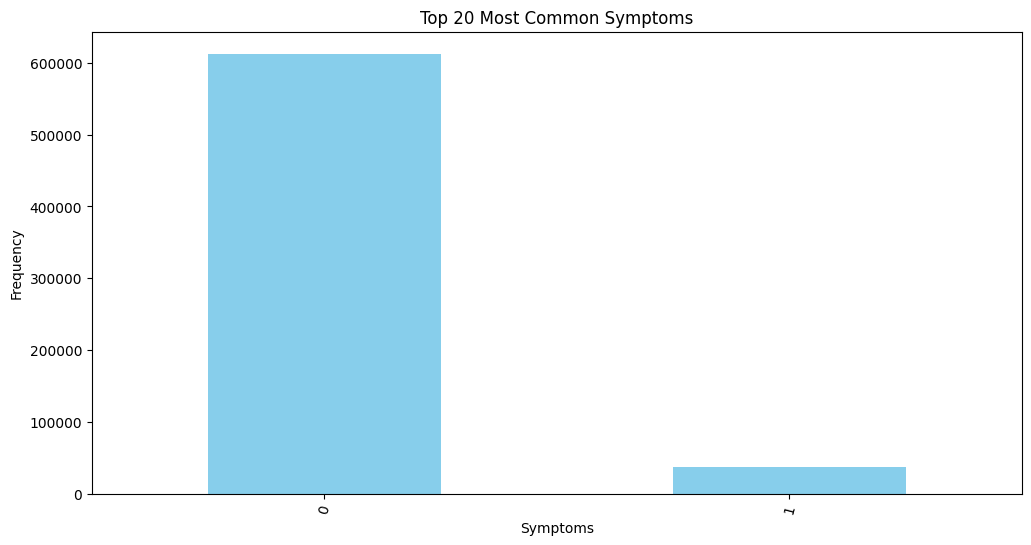

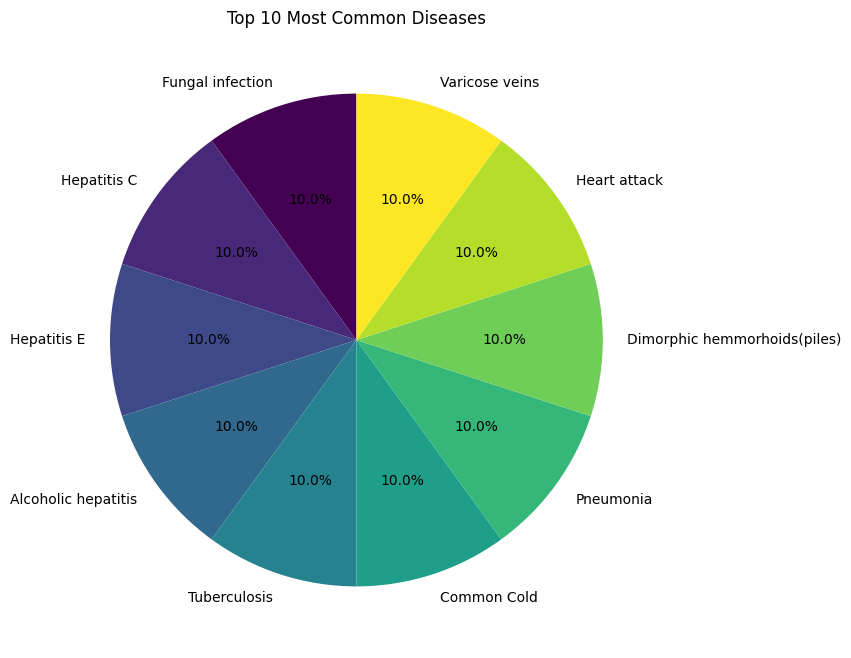

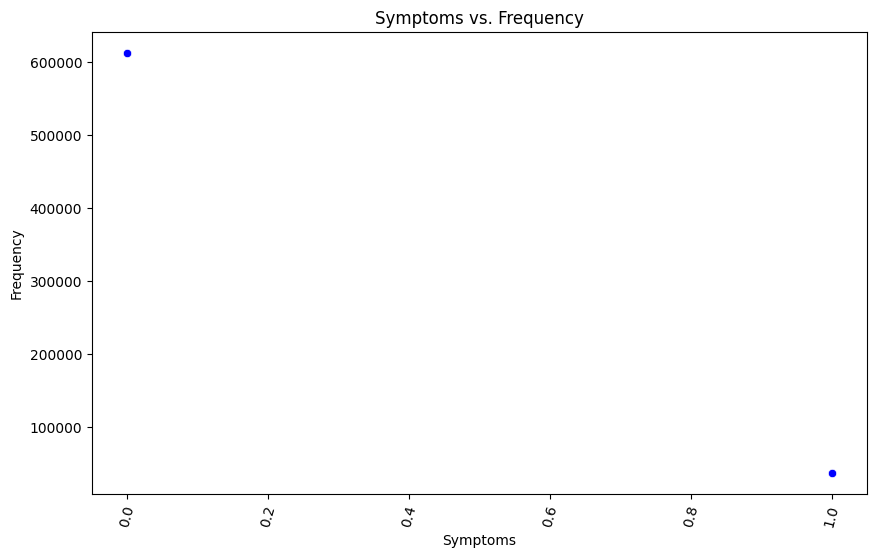

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
training_data = pd.read_csv("/content/Training.csv")

# Fill missing values
training_data.fillna("", inplace=True)

# Count the frequency of each symptom
symptom_counts = training_data.drop(columns=['prognosis']).apply(lambda x: x.value_counts()).sum(axis=1)

# Bar Chart - Most frequently occurring symptoms
plt.figure(figsize=(12, 6))
symptom_counts.sort_values(ascending=False).head(20).plot(kind='bar', color='skyblue')
plt.title("Top 20 Most Common Symptoms")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.xticks(rotation=75)
plt.show()

# Pie Chart - Top 10 diseases
plt.figure(figsize=(8, 8))
training_data['prognosis'].value_counts().head(10).plot(kind='pie', autopct='%1.1f%%', cmap="viridis", startangle=90)
plt.title("Top 10 Most Common Diseases")
plt.ylabel("")
plt.show()

# Line Chart - Symptoms over time (If 'date' column exists)
if 'date' in training_data.columns:
    training_data['date'] = pd.to_datetime(training_data['date'])
    symptom_over_time = training_data.groupby('date').count()

    plt.figure(figsize=(10, 5))
    plt.plot(symptom_over_time.index, symptom_over_time.iloc[:, 0], marker='o', linestyle='-', color='r')
    plt.title("Trend of Reported Symptoms Over Time")
    plt.xlabel("Date")
    plt.ylabel("Number of Cases")
    plt.xticks(rotation=45)
    plt.show()

# Scatter Plot - Distribution of symptoms
plt.figure(figsize=(10, 6))
sns.scatterplot(x=symptom_counts.index, y=symptom_counts.values, color='blue')
plt.xticks(rotation=75)
plt.title("Symptoms vs. Frequency")
plt.xlabel("Symptoms")
plt.ylabel("Frequency")
plt.show()
